# > CS23MTECH11025 : ARNAB GHOSH

# > CS23MTECH11029 : PATEL HEETKUMAR D.

# Importing required libraries, Importing dataset and creating numpy array

In [ ]:
#import python libraries
import scipy
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, normalized_mutual_info_score, adjusted_rand_score
from scipy.stats import mode
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
#load .mat dataset using scipy
mat_dataset = scipy.io.loadmat('/content/train_32x32.mat')
print("Train Dataset")
print(mat_dataset)

Train Dataset
{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Dec  5 21:09:26 2011', '__version__': '1.0', '__globals__': [], 'X': array([[[[ 33,  84,  19, ...,  92, 190, 216],
         [ 30,  76,  54, ...,  78, 188, 217],
         [ 38,  59, 110, ..., 101, 191, 212]],

        [[ 15,  86,  20, ...,  94, 205, 221],
         [ 23,  73,  52, ...,  82, 203, 222],
         [ 19,  66, 111, ..., 105, 206, 217]],

        [[ 15,  77,  25, ..., 114, 220, 226],
         [ 17,  78,  57, ..., 101, 218, 227],
         [ 19,  56, 116, ..., 125, 220, 221]],

        ...,

        [[ 72,  90,  65, ..., 200, 229, 200],
         [ 65,  78, 144, ..., 201, 231, 199],
         [ 56,  69, 223, ..., 203, 224, 191]],

        [[ 82,  88,  78, ..., 192, 229, 193],
         [ 77,  77, 148, ..., 193, 229, 188],
         [ 57,  67, 218, ..., 195, 224, 182]],

        [[ 89,  88,  98, ..., 190, 229, 197],
         [ 79,  78, 158, ..., 191, 228, 189],
         [ 59,  66, 220, ..., 193, 223

In [ ]:
#converting X and y of dataset into respective numpy array and select randomly 2500 tuples from each class
X = np.array(mat_dataset['X'])
Y = np.array(mat_dataset['y'])
y = Y.flatten() - 1
selected_X = []
selected_Y = []
for i in range(10):
    indices = np.where(y==i)[0]
    s_indices = np.random.choice(indices,2500,replace=False)
    selected_X.append(X[:,:,:,s_indices])
    selected_Y.append(Y[s_indices])
X = np.concatenate(selected_X,axis=3)
Y = np.concatenate(selected_Y)
print("X : ",X)
print("Y : ",Y)

X :  [[[[111 130 114 ... 171  64 155]
   [101 137 109 ... 166  69  92]
   [100 147  90 ... 172  69  77]]

  [[111 130 112 ... 171  58 160]
   [101 135 107 ... 166  63  94]
   [100 145  88 ... 172  63  73]]

  [[110 128 111 ... 170  59 170]
   [100 132 106 ... 167  64 101]
   [ 99 142  87 ... 172  62  74]]

  ...

  [[118 124  99 ... 140  72 167]
   [123 134  98 ... 135  72 100]
   [126 136  96 ... 128  68  78]]

  [[117 127 105 ... 149  80 173]
   [121 134 105 ... 143  77 103]
   [124 137 103 ... 133  76  76]]

  [[116 129 114 ... 154  94 176]
   [120 136 114 ... 147  96 105]
   [123 140 112 ... 136  96  75]]]


 [[[112 130 114 ... 172  63 133]
   [102 135 109 ... 167  67  81]
   [100 146  90 ... 174  71  77]]

  [[112 129 112 ... 171  62 142]
   [102 133 107 ... 167  67  84]
   [100 144  88 ... 173  70  74]]

  [[111 128 111 ... 170  61 152]
   [101 132 106 ... 168  66  90]
   [ 99 141  86 ... 173  70  75]]

  ...

  [[116 129  98 ... 138  84 160]
   [121 134  98 ... 133  83  97]
   [

## Q2 (a) k means clustering on raw data and data obtained after PCA from Q1(a) and Q1(b)

In [ ]:
#converting the X from shape (32 * 32 * 3 * 25000) to shape (25000 * 32 * 32 * 3)
#then reshaping it to (25000 * 3072) by converting it by flattening of other dimensions
X_shape = X.shape
reshape_X = X.transpose(3,0,1,2).reshape(X_shape[3],-1)
print(reshape_X.shape)

(25000, 3072)


In [ ]:
#standardizing X data
scaler = StandardScaler()
reshape_X_standardized = scaler.fit_transform(reshape_X)

In [ ]:
#flattening Y
Y_flatten = Y.flatten()

In [ ]:
#finding the labels occur at each cluster to know whether same data cluster together
def find_true_labels(k,k_means_cluster,X):
    cluster_index = k_means_cluster.predict(X)
    index_dict = {}
    for i in range(k):
        indices = np.where(cluster_index==i)[0]
        index_dict[i] = indices
    c = 0
    true_label = {}
    for i in index_dict.values():
        tmp_dict = {}
        for j in i:
            for k in range(1,11):
                if Y[j]==k:
                    if k in tmp_dict:
                        tmp_dict[k] += 1
                    else:
                        tmp_dict[k] = 1
        print(f"Cluster {c+1}")
        c+=1
        print(tmp_dict)


In [ ]:
#plotting closest image to centroid
def plot_nearest_centroids(f,reshape_X,reconstructed_X,kmc_labels,kmc_centers):
    plt.figure(figsize = (12,6))
    for i in range(10):
        id = np.argmin(np.sum((reshape_X[kmc_labels == i] - kmc_centers[i])**2, axis=1))
        plt.subplot(2,5,i+1)
        if f == 0:
            plt.imshow(reshape_X[id].reshape(32,32,3))
        else:
            reconstructed_X[id] = ( reconstructed_X[id] - np.min(reconstructed_X[id]) ) / ( np.max(reconstructed_X[id]) - np.min(reconstructed_X[id]) )
            plt.imshow(reconstructed_X[id].reshape(32,32,3))
        plt.title(f"Image No. {i+1}")
    plt.suptitle("Nearest point to the centroid",fontsize=20)
    plt.show()

Per Cluster True Label of Image
Cluster 1
{1: 305, 2: 335, 3: 343, 4: 323, 5: 349, 6: 350, 7: 330, 8: 324, 9: 298, 10: 338}
Cluster 2
{1: 286, 2: 332, 3: 297, 4: 318, 5: 321, 6: 335, 7: 328, 8: 321, 9: 350, 10: 342}
Cluster 3
{1: 312, 2: 300, 3: 280, 4: 296, 5: 254, 6: 240, 7: 257, 8: 258, 9: 250, 10: 241}
Cluster 4
{1: 329, 2: 294, 3: 294, 4: 309, 5: 328, 6: 302, 7: 368, 8: 281, 9: 284, 10: 273}
Cluster 5
{1: 72, 2: 119, 3: 102, 4: 139, 5: 125, 6: 149, 7: 148, 8: 158, 9: 138, 10: 199}
Cluster 6
{1: 140, 2: 138, 3: 135, 4: 137, 5: 142, 6: 146, 7: 105, 8: 156, 9: 121, 10: 144}
Cluster 7
{1: 324, 2: 305, 3: 355, 4: 373, 5: 322, 6: 332, 7: 313, 8: 364, 9: 416, 10: 335}
Cluster 8
{1: 163, 2: 147, 3: 141, 4: 86, 5: 81, 6: 80, 7: 90, 8: 70, 9: 70, 10: 27}
Cluster 9
{1: 310, 2: 289, 3: 297, 4: 282, 5: 333, 6: 310, 7: 299, 8: 314, 9: 326, 10: 338}
Cluster 10
{1: 259, 2: 241, 3: 256, 4: 237, 5: 245, 6: 256, 7: 262, 8: 254, 9: 247, 10: 263}




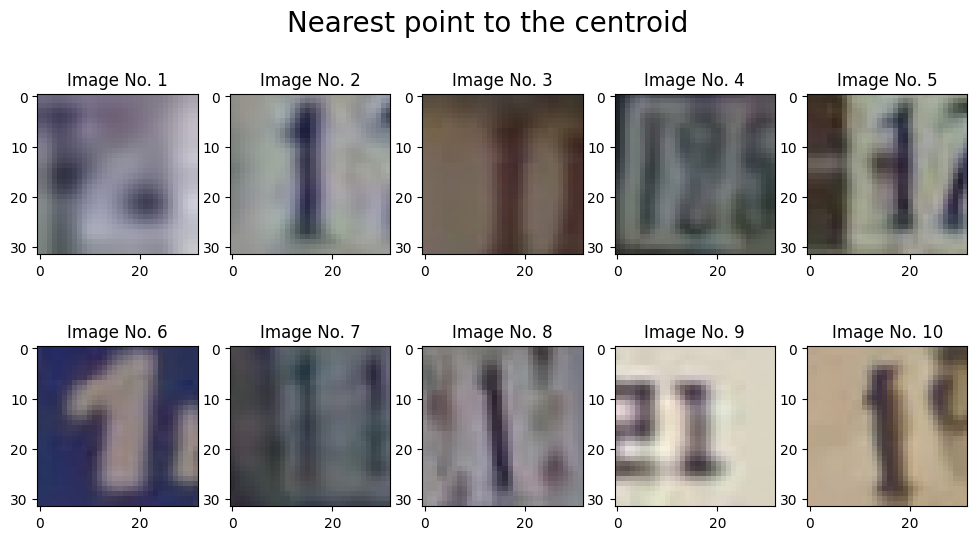

In [ ]:
#fitting raw data to k means clustering and plotting image to centroid image
raw_k_means_cluster = KMeans(n_clusters = 10,n_init="auto")
raw_k_means_cluster.fit(reshape_X_standardized)
raw_kmc_labels = raw_k_means_cluster.labels_
raw_kmc_centers = raw_k_means_cluster.cluster_centers_
print("Per Cluster True Label of Image")
raw_cluster_index = find_true_labels(10,raw_k_means_cluster,reshape_X_standardized)
print("\n")
plot_nearest_centroids(0,reshape_X,None,raw_kmc_labels,raw_kmc_centers)

Per Cluster True Label of Image
Cluster 1
{1: 251, 2: 242, 3: 231, 4: 216, 5: 225, 6: 234, 7: 225, 8: 231, 9: 214, 10: 250}
Cluster 2
{1: 313, 2: 307, 3: 333, 4: 333, 5: 326, 6: 295, 7: 346, 8: 297, 9: 369, 10: 291}
Cluster 3
{1: 365, 2: 409, 3: 384, 4: 399, 5: 415, 6: 395, 7: 407, 8: 407, 9: 423, 10: 390}
Cluster 4
{1: 236, 2: 219, 3: 239, 4: 288, 5: 225, 6: 223, 7: 211, 8: 311, 9: 285, 10: 290}
Cluster 5
{1: 117, 2: 111, 3: 111, 4: 121, 5: 111, 6: 121, 7: 85, 8: 131, 9: 103, 10: 118}
Cluster 6
{1: 77, 2: 97, 3: 84, 4: 116, 5: 110, 6: 142, 7: 140, 8: 132, 9: 108, 10: 171}
Cluster 7
{1: 360, 2: 360, 3: 379, 4: 368, 5: 365, 6: 382, 7: 347, 8: 370, 9: 342, 10: 368}
Cluster 8
{1: 200, 2: 149, 3: 148, 4: 89, 5: 85, 6: 89, 7: 96, 8: 62, 9: 80, 10: 29}
Cluster 9
{1: 309, 2: 279, 3: 275, 4: 278, 5: 309, 6: 294, 7: 325, 8: 244, 9: 243, 10: 264}
Cluster 10
{1: 272, 2: 327, 3: 316, 4: 292, 5: 329, 6: 325, 7: 318, 8: 315, 9: 333, 10: 329}




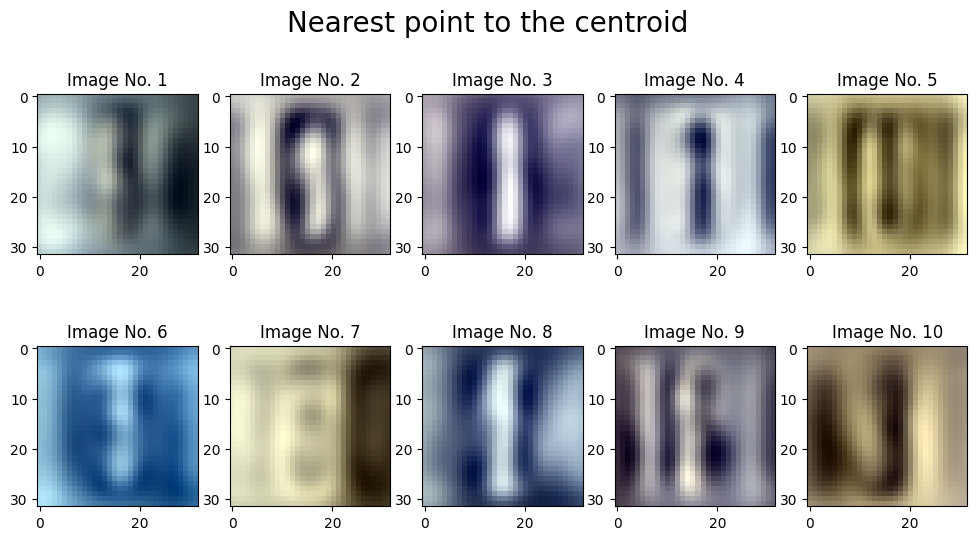

In [ ]:
#fitting data obtain after 1(a) to k means clustering and plotting image to centroid image
eigenvectors_count = 27 #as obtain in question 1(a)
pca_a = PCA(n_components = eigenvectors_count)
reduced_X_a = pca_a.fit_transform(reshape_X_standardized)
reconstructed_X_a = np.dot(reduced_X_a,pca_a.components_) + pca_a.mean_
pca_a_k_means_cluster = KMeans(n_clusters = 10,n_init="auto")
pca_a_k_means_cluster.fit(reduced_X_a)
pca_a_kmc_labels = pca_a_k_means_cluster.labels_
pca_a_kmc_centers = pca_a_k_means_cluster.cluster_centers_
print("Per Cluster True Label of Image")
pca_a_cluster_index = find_true_labels(10,pca_a_k_means_cluster,reduced_X_a)
print("\n")
plot_nearest_centroids(1,reduced_X_a,reconstructed_X_a,pca_a_kmc_labels,pca_a_kmc_centers)

Per Cluster True Label of Image
Cluster 1
{1: 315, 2: 275, 3: 274, 4: 282, 5: 301, 6: 290, 7: 319, 8: 249, 9: 244, 10: 256}
Cluster 2
{1: 297, 2: 358, 3: 307, 4: 319, 5: 349, 6: 341, 7: 358, 8: 364, 9: 379, 10: 351}
Cluster 3
{1: 107, 2: 99, 3: 105, 4: 112, 5: 102, 6: 109, 7: 76, 8: 123, 9: 96, 10: 102}
Cluster 4
{1: 284, 2: 322, 3: 334, 4: 310, 5: 330, 6: 349, 7: 312, 8: 328, 9: 303, 10: 347}
Cluster 5
{1: 233, 2: 206, 3: 212, 4: 193, 5: 204, 6: 216, 7: 204, 8: 207, 9: 190, 10: 218}
Cluster 6
{1: 247, 2: 197, 3: 228, 4: 282, 5: 200, 6: 201, 7: 171, 8: 250, 9: 242, 10: 209}
Cluster 7
{1: 273, 2: 329, 3: 294, 4: 254, 5: 285, 6: 266, 7: 284, 8: 261, 9: 274, 10: 260}
Cluster 8
{1: 297, 2: 290, 3: 336, 4: 325, 5: 335, 6: 307, 7: 346, 8: 303, 9: 371, 10: 309}
Cluster 9
{1: 322, 2: 289, 3: 280, 4: 279, 5: 260, 6: 242, 7: 255, 8: 255, 9: 265, 10: 254}
Cluster 10
{1: 125, 2: 135, 3: 130, 4: 144, 5: 134, 6: 179, 7: 175, 8: 160, 9: 136, 10: 194}




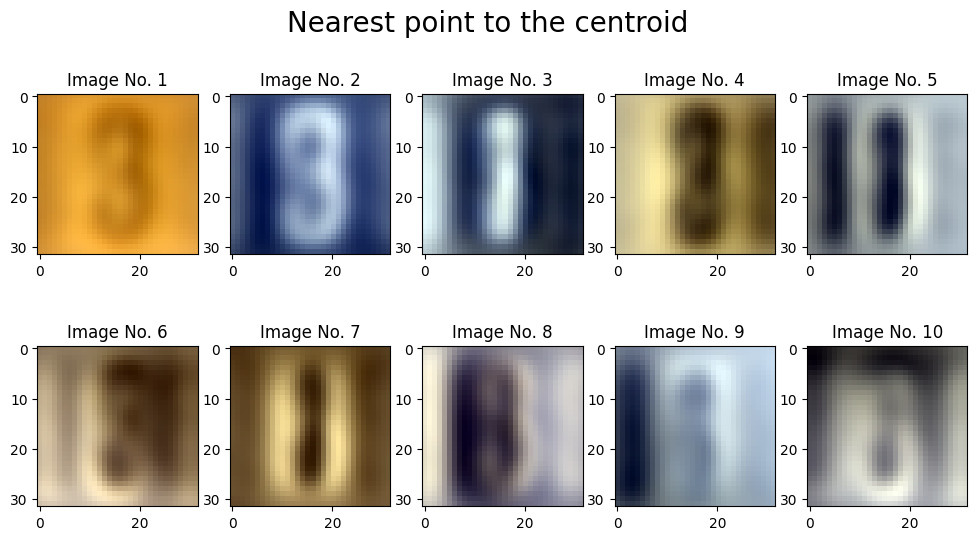

In [ ]:
#fitting data obtain after 1(b) to k means clustering and plotting image to centroid image
eigenvectors_count = 10 #as obtain in question 1(b)
pca_b = PCA(n_components = eigenvectors_count)
reduced_X_b = pca_b.fit_transform(reshape_X_standardized)
reconstructed_X_b = np.dot(reduced_X_b,pca_b.components_) + pca_b.mean_
pca_b_k_means_cluster = KMeans(n_clusters = 10,n_init="auto")
pca_b_k_means_cluster.fit(reduced_X_b)
pca_b_kmc_labels = pca_b_k_means_cluster.labels_
pca_b_kmc_centers = pca_b_k_means_cluster.cluster_centers_
print("Per Cluster True Label of Image")
pca_b_cluster_index = find_true_labels(10,pca_b_k_means_cluster,reduced_X_b)
print("\n")
plot_nearest_centroids(1,reduced_X_b,reconstructed_X_b,pca_b_kmc_labels,pca_b_kmc_centers)

## Q2 (b) Sum Square error and evaluation matric purity & rand-index on each cluster model obtain in Q2(a)

In [ ]:
#module which calculate the sum square error
def sum_square_error(labels, X, centers):
    sse = 0
    for i in range(len(centers)):
        cluster_points = X[labels == i]
        sse += np.sum((cluster_points - centers[i]) ** 2)
    return sse

In [ ]:
#module that generate evaluation metrics
def evaluate_clustering(labels_true, labels_pred):
    purity = normalized_mutual_info_score(labels_true, labels_pred)
    rand_index = adjusted_rand_score(labels_true, labels_pred)
    return purity, rand_index

In [ ]:
#calculating sum square error and evaluation metric for raw data
sse = sum_square_error(raw_kmc_labels, reshape_X , raw_kmc_centers)
purity_raw, rand_index_raw = evaluate_clustering(Y_flatten, raw_kmc_labels)
print("Raw Data - SSE:", sse)
print("Raw Data - Purity:", purity_raw)
print("Raw Data - Rand Index:", rand_index_raw)

Raw Data - SSE: 1207797303569.471
Raw Data - Purity: 0.0032869008754881253
Raw Data - Rand Index: 0.00070349197128044


In [ ]:
#calculating sum square error and evaluation metric for data obtain after 1(a)
sse = sum_square_error(pca_a_kmc_labels, reduced_X_a , pca_a_kmc_centers)
purity_raw, rand_index_raw = evaluate_clustering(Y_flatten, pca_a_kmc_labels)
print("Data after 1(a) - SSE:", sse)
print("Data after 1(a) - Purity:", purity_raw)
print("Data after 1(a) - Rand Index:", rand_index_raw)

Data after 1(a) - SSE: 24115739.977611996
Data after 1(a) - Purity: 0.003600656397716467
Data after 1(a) - Rand Index: 0.0007340999915621382


In [ ]:
#calculating sum square error and evaluation metric for data obtain after 1(b)
sse = sum_square_error(pca_b_kmc_labels, reduced_X_b , pca_b_kmc_centers)
purity_raw, rand_index_raw = evaluate_clustering(Y_flatten, pca_b_kmc_labels)
print("Data after 1(b) - SSE:", sse)
print("Data after 1(b) - Purity:", purity_raw)
print("Data after 1(b) - Rand Index:", rand_index_raw)

Data after 1(b) - SSE: 17938265.93579723
Data after 1(b) - Purity: 0.0017539724639217824
Data after 1(b) - Rand Index: 0.0004910902066490206


## Q2 (c) Labeling each cluster with most frequently occured digit and comparing it with Q1 (c) accuracy


In [ ]:
#module that assign cluster label with most frequently occured digit
def assign_cluster_labels(labels, true_labels):
    cluster_labels = np.zeros_like(labels)
    for i in range(len(np.unique(labels))):
        cluster_indices = (labels == i)
        mode_label = mode(true_labels[cluster_indices])
        max_label = mode_label[0]
        print(f"Cluster {i} maximum occuring true label ",max_label)
        cluster_labels[cluster_indices] = max_label
    return cluster_labels

In [ ]:
# Assign cluster labels based on the most frequent digit within each cluster
raw_maxoccur_cluster_labels_ = assign_cluster_labels(raw_kmc_labels, Y_flatten)
print("Reassigned cluster labels according to max occurance", raw_maxoccur_cluster_labels_)
accuracy_raw = accuracy_score(Y_flatten, raw_maxoccur_cluster_labels_)
print("Accuracy after label modification on raw data",accuracy_raw)

Cluster 0 maximum occuring true label  6
Cluster 1 maximum occuring true label  9
Cluster 2 maximum occuring true label  1
Cluster 3 maximum occuring true label  7
Cluster 4 maximum occuring true label  10
Cluster 5 maximum occuring true label  8
Cluster 6 maximum occuring true label  9
Cluster 7 maximum occuring true label  1
Cluster 8 maximum occuring true label  10
Cluster 9 maximum occuring true label  10
Reassigned cluster labels according to max occurance [10  1 10 ... 10  9  6]
Accuracy after label modification on raw data 0.1166


In [ ]:
# Assign cluster labels based on the most frequent digit within each cluster
pca_a_maxoccur_cluster_labels_ = assign_cluster_labels(pca_a_kmc_labels, Y_flatten)
print("Reassigned cluster labels according to max occurance", pca_a_maxoccur_cluster_labels_)
accuracy_pca_a = accuracy_score(Y_flatten, pca_a_maxoccur_cluster_labels_)
print("Accuracy after label modification on data obtain after PCA in 1(a)",accuracy_pca_a)

Cluster 0 maximum occuring true label  1
Cluster 1 maximum occuring true label  9
Cluster 2 maximum occuring true label  9
Cluster 3 maximum occuring true label  8
Cluster 4 maximum occuring true label  8
Cluster 5 maximum occuring true label  10
Cluster 6 maximum occuring true label  6
Cluster 7 maximum occuring true label  1
Cluster 8 maximum occuring true label  7
Cluster 9 maximum occuring true label  9
Reassigned cluster labels according to max occurance [ 9  9  8 ... 10  9  6]
Accuracy after label modification on data obtain after PCA in 1(a) 0.11584


In [ ]:
# Assign cluster labels based on the most frequent digit within each cluster
pca_b_maxoccur_cluster_labels_ = assign_cluster_labels(pca_b_kmc_labels, Y_flatten)
print("Reassigned cluster labels according to max occurance", pca_b_maxoccur_cluster_labels_)
accuracy_pca_b = accuracy_score(Y_flatten, pca_b_maxoccur_cluster_labels_)
print("Accuracy after label modification on data obtain after PCA in 1(b)",accuracy_pca_b)

Cluster 0 maximum occuring true label  7
Cluster 1 maximum occuring true label  9
Cluster 2 maximum occuring true label  8
Cluster 3 maximum occuring true label  6
Cluster 4 maximum occuring true label  1
Cluster 5 maximum occuring true label  4
Cluster 6 maximum occuring true label  2
Cluster 7 maximum occuring true label  9
Cluster 8 maximum occuring true label  1
Cluster 9 maximum occuring true label  10
Reassigned cluster labels according to max occurance [ 9  1  4 ... 10  9  6]
Accuracy after label modification on data obtain after PCA in 1(b) 0.11604


###**Accuracy comparision between k-NN model Q1(c) and k means clustering model**

Accuracy of raw data, pca_a data and pca_b data in Q1(c) is around 41%, 40% and 26% whereas the accuracy in kmeans clustering model is 11.44%, 11.17%, 11.67% simultaneously.

## Q2 (d) k means on data obtained after PCA 1(a) with k = 5

Per Cluster True Label of Image
Cluster 1
{1: 502, 2: 466, 3: 496, 4: 487, 5: 510, 6: 498, 7: 548, 8: 441, 9: 443, 10: 459}
Cluster 2
{1: 441, 2: 484, 3: 452, 4: 431, 5: 428, 6: 444, 7: 471, 8: 432, 9: 413, 10: 444}
Cluster 3
{1: 728, 2: 711, 3: 736, 4: 793, 5: 729, 6: 716, 7: 693, 8: 754, 9: 800, 10: 723}
Cluster 4
{1: 609, 2: 635, 3: 604, 4: 597, 5: 636, 6: 614, 7: 628, 8: 646, 9: 652, 10: 653}
Cluster 5
{1: 220, 2: 204, 3: 212, 4: 192, 5: 197, 6: 228, 7: 160, 8: 227, 9: 192, 10: 221}




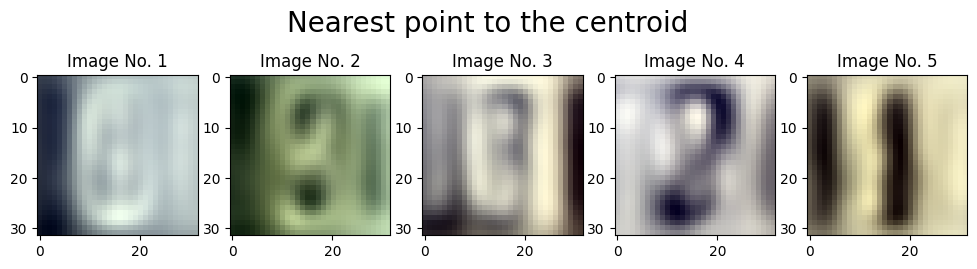

K means for k = 5 - SSE: 27948130.762235876
K means for k = 5 - Purity: 0.0007240441456748833
K means for k = 5 - Rand Index: 0.0001698181225355208
Accuracy on data obtain after PCA in 1(a) with k means k = 5 : 0.07792


In [ ]:
#doing above one with k = 5 in k means clustering for data obtain after PCA 1(a)
pca_a_k_means_cluster = KMeans(n_clusters = 5,n_init="auto")
pca_a_k_means_cluster.fit(reduced_X_a)
pca_a_kmc_labels = pca_a_k_means_cluster.labels_
pca_a_kmc_centers = pca_a_k_means_cluster.cluster_centers_
print("Per Cluster True Label of Image")
pca_a_cluster_index = find_true_labels(5,pca_a_k_means_cluster,reduced_X_a)
print("\n")
plt.figure(figsize = (12,3))
for i in range(5):
    id = np.argmin(np.sum((reshape_X[pca_a_kmc_labels == i] - pca_a_kmc_labels[i])**2, axis=1))
    plt.subplot(1,5,i+1)
    reconstructed_X_a[id] = ( reconstructed_X_a[id] - np.min(reconstructed_X_a[id]) ) / ( np.max(reconstructed_X_a[id]) - np.min(reconstructed_X_a[id]) )
    plt.imshow(reconstructed_X_a[id].reshape(32,32,3))
    plt.title(f"Image No. {i+1}")
plt.suptitle("Nearest point to the centroid",fontsize=20)
plt.show()
sse = sum_square_error(pca_a_kmc_labels, reduced_X_a , pca_a_kmc_centers)
purity_raw, rand_index_raw = evaluate_clustering(Y_flatten, pca_a_kmc_labels)
print("K means for k = 5 - SSE:", sse)
print("K means for k = 5 - Purity:", purity_raw)
print("K means for k = 5 - Rand Index:", rand_index_raw)


accuracy_pca_a = accuracy_score(Y_flatten, pca_a_kmc_labels)
print("Accuracy on data obtain after PCA in 1(a) with k means k = 5 :",accuracy_pca_a)

According to the above output we found every cluster is having image data from each class.